### aim: check old/new restarts

use "TOM12_PT_TC09/restart_trc_first_year.nc"
use "TOM12_PT_TC11/restart_trc.nc"
use "/gpfs/data/greenocean/mesh_mask_v3_5.nc"



### date: 

NameError: name 'np' is not defined

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


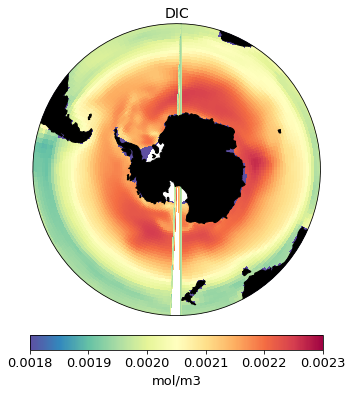

In [4]:
def plot_southern(fig, ax1, lons, lats, tdat, tvmin, 
tvmax, tticks, fs = 12, 
tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
    ax1.set_extent([-180, 180, -80, -28], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    mesh = ax1.pcolormesh(lons, lats, tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax, 
            transform=ccrs.PlateCarree())
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                        edgecolor='face', facecolor='k'))
    ax1.set_title(tit, fontsize = fs)
    cb = 0
    if cbr:
        cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
            pad = 0.06, fraction = 0.045, shrink = 0.9)
        cb.set_label(label=cbarlab,fontsize = fs-1)
        cb.set_ticks(tticks, fontsize = 80)
        cb.ax.tick_params(labelsize=fs-1)
        return cb
#### open file
tfil = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_DW_GA01/ORCA2_1m_19810101_19811231_ptrc_T.nc')
tdat = tfil.DIC[0,0,:,:].values
lats = tfil.nav_lat; lons = tfil.nav_lon
tvmin = 1.8e-3; tvmax = 2.301e-3; intvl = 1e-4
tticks = np.arange(tvmin , tvmax, intvl)
tcbarlab = 'mol/m3'; ttit = 'DIC'
tfs = 14
fact = 0.6
fig = plt.figure(figsize=[10*fact, 10*fact])
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0, -90))
plot_southern(fig, ax1, lons, lats, tdat, tvmin, 
            tvmax, tticks, fs = tfs, 
            tit = ttit, cbarlab = tcbarlab, tcmap = 'Spectral_r', lm = True, cbr = True)

In [64]:
import gsw

In [14]:
PT_TC09 = xr.open_dataset('/gpfs/home/avd22gnu/scratch/codeTesting/restartFiles/tracer/restart_19471231_trc_PT_NO3.nc')
PT_TC11 = xr.open_dataset('/gpfs/home/avd22gnu/scratch/codeTesting/restartFiles/tracer/restart_19471231_trc_PT_TEST.nc')

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]
tmesh['cvol'] = cvol

In [98]:
glodap = '/gpfs/data/greenocean/observations/GLODAPv2.2016b_MappedClimatologies/'

Tf = xr.open_dataset(f'{glodap}GLODAPv2.2016b.temperature.nc')
Sf = xr.open_dataset(f'{glodap}GLODAPv2.2016b.salinity.nc')
DICf = xr.open_dataset(f'{glodap}GLODAPv2.2016b.TCO2.nc')
DIC_1947f = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/Tuning/GLODAP_AnthDIC/EstimatedDIC_1947.nc')
TAlkf = xr.open_dataset(f'{glodap}GLODAPv2.2016b.TAlk.nc')


In [99]:
DIC_1947f

<xarray.Dataset>
Dimensions:            (depth: 33, lat: 180, lon: 360)
Coordinates:
  * depth              (depth) float64 0.0 10.0 20.0 ... 4.5e+03 5e+03 5.5e+03
  * lat                (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                (lon) float64 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
Data variables:
    Reconstructed_DIC  (depth, lat, lon) float64 ...
Attributes:
    made in:  Tuning/glodapBasedRestart.ipynb

In [101]:

T = Tf['temperature'].values #in situ
S = Sf['salinity'].values * 35.16504/35.000 #reference salt

pressure = np.zeros([33,180,360])
for i in range(0,180):
    for j in range(0,360):
        pressure[:,i,j] = TAlkf.Depth.values

dens = gsw.density.rho_t_exact(S, T, pressure)


DIC = DICf['TCO2'].values
DIC_1947 = DIC_1947f['Reconstructed_DIC'].values
TAlk = TAlkf['TAlk'].values

tDIC=DIC
tALK=TAlk
tDIC_mu=DIC*dens/1000
tALK_mu=TAlk*dens/1000

DIC0_mu = np.nanmean(np.nanmean(tDIC_mu, axis = 2),axis = 1)
TAlk0_mu = np.nanmean(np.nanmean(tALK_mu, axis = 2),axis = 1)
DIC0 = np.nanmean(np.nanmean(tDIC, axis = 2),axis = 1)
TAlk0 = np.nanmean(np.nanmean(tALK, axis = 2),axis = 1)

tDIC_1947=DIC_1947
tDIC_1947_mu=DIC_1947*dens/1000
DIC_19470_mu = np.nanmean(np.nanmean(tDIC_1947_mu, axis = 2),axis = 1)
DIC_19470 = np.nanmean(np.nanmean(tDIC_1947, axis = 2),axis = 1)


<Figure size 432x288 with 0 Axes>

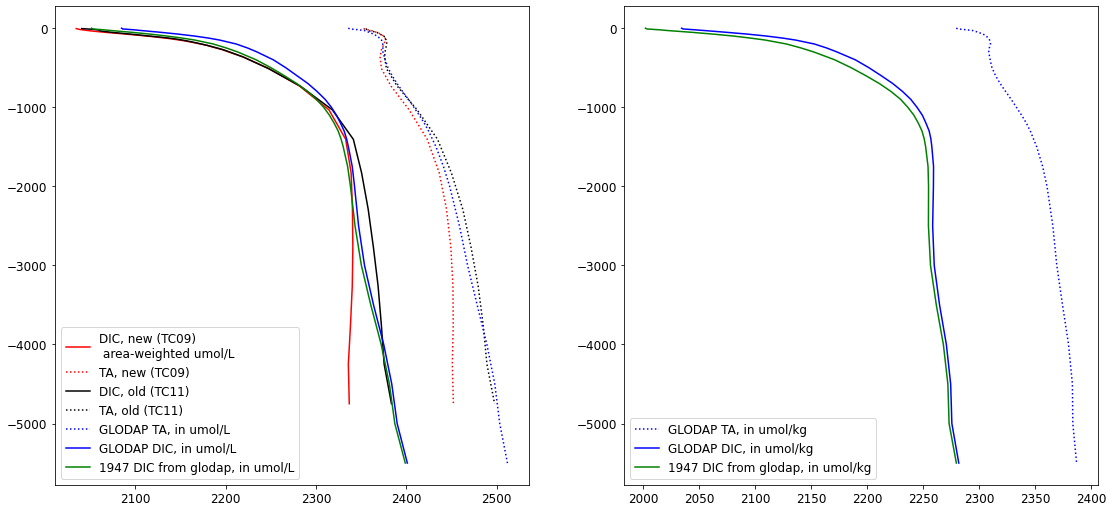

In [105]:
PT_TC09.TRNDIC

PT_TC09_DIC = PT_TC09.TRNDIC.weighted(tmesh['cvol']).mean(dim = ['x','y']) * 1e6 #new
PT_TC11_DIC = PT_TC11.TRNDIC.weighted(tmesh['cvol']).mean(dim = ['x','y'])* 1e6
PT_TC09_Alkalini = PT_TC09.TRNAlkalini.weighted(tmesh['cvol']).mean(dim = ['x','y'])* 1e6 #new
PT_TC11_Alkalini = PT_TC11.TRNAlkalini.weighted(tmesh['cvol']).mean(dim = ['x','y'])* 1e6

depth = tmesh.gdept_1d[0,:].values
plt.figure()

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(17*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].plot(PT_TC09_DIC,-depth, 'r-', label ='DIC, new (TC09) \n area-weighted umol/L')
axs[0].plot(PT_TC09_Alkalini,-depth, 'r:', label ='TA, new (TC09)')

axs[0].plot(PT_TC11_DIC,-depth, 'k-', label ='DIC, old (TC11)')
axs[0].plot(PT_TC11_Alkalini,-depth, 'k:', label ='TA, old (TC11)')


axs[0].plot(TAlk0_mu,-TAlkf.Depth,'b:', label = 'GLODAP TA, in umol/L')
axs[0].plot(DIC0_mu,-TAlkf.Depth,'b-', label = 'GLODAP DIC, in umol/L')
axs[0].plot(DIC_19470_mu,-TAlkf.Depth,'g-', label = '1947 DIC from glodap, in umol/L')
axs[0].legend()

axs[1].plot(TAlk0,-TAlkf.Depth,'b:', label = 'GLODAP TA, in umol/kg')
axs[1].plot(DIC0,-TAlkf.Depth,'b-', label = 'GLODAP DIC, in umol/kg')
axs[1].plot(DIC_19470,-TAlkf.Depth,'g-', label = '1947 DIC from glodap, in umol/kg')
axs[1].legend()

In [78]:
print(S[:,100,200])
print(T[:,100,200])
print(dens[:,100,200])

[34.34631712 34.34209733 34.20328897 34.2865119  34.7266383  34.68041229
 34.6552967  34.70143073 34.79373329 34.86768878 34.86046417 34.8441561
 34.79543117 34.73203856 34.70314778 34.69132394 34.69879001 34.7071376
 34.71914157 34.72950132 34.73904087 34.74829297 34.75763323 34.76751389
 34.78946751 34.80732783 34.82736894 34.83852972 34.84738705 34.85499876
 34.85799976         nan         nan]
[27.50108147 27.51020813 27.63371468 27.38515282 25.97217941 22.69185829
 16.42845345 13.26630211 12.11570835 11.28251171 10.63181591 10.11273861
  9.11127663  8.04005051  7.00021648  6.11081505  5.4293313   4.92191601
  4.38398218  4.05467701  3.74572158  3.45982695  3.18925166  2.92507744
  2.47666287  2.12239313  1.83066964  1.65755367  1.49760461  1.39448798
  1.40137494         nan         nan]
[1021.94494464 1021.9817906  1021.88093327 1022.06639474 1022.93008543
 1023.9849375  1025.70490051 1026.54337232 1026.95534976 1027.39510466
 1027.73373329 1028.03886631 1028.62455331 1029.202722

In [72]:
plt.pcolormesh(dens[0,100,100])

IndexError: index 200 is out of bounds for axis 1 with size 180

In [50]:
import seawater
dens = seawater.dens(tSAL,tTEMP,tPRES)
tDIC=tDIC*dens/1000
tALK=tALK*dens/1000

<xarray.DataArray 'Depth' (depth_surface: 33)>
array([   0.,   10.,   20.,   30.,   50.,   75.,  100.,  125.,  150.,  200.,
        250.,  300.,  400.,  500.,  600.,  700.,  800.,  900., 1000., 1100.,
       1200., 1300., 1400., 1500., 1750., 2000., 2500., 3000., 3500., 4000.,
       4500., 5000., 5500.])
Dimensions without coordinates: depth_surface
Attributes:
    units:     m
    positive:  down

<Figure size 432x288 with 0 Axes>

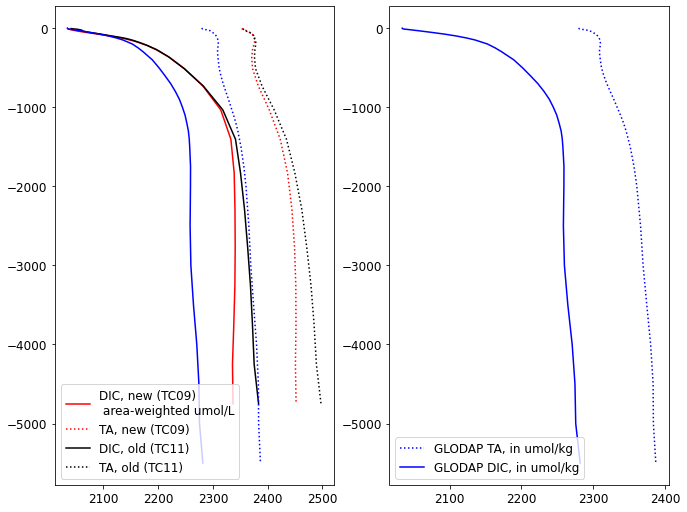

<xarray.DataArray 'TCO2' ()>
array(nan)
Coordinates:
    lon      float64 40.5
    lat      float64 -69.5
Attributes:
    long_name:    moles of dissolved inorganic carbon per unit mass in seawater
    units:        micro-mol kg-1
    Description:  The GLODAPv2.2016b input data were normalized to the year 2...
    time_period:  For all surfaces (1-33) data from the years 1972-2013 inclu...


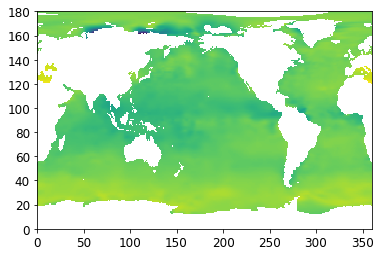

In [39]:
plt.pcolormesh(DIC['TCO2'][0,:,:])

print(DIC['TCO2'][0,20,20])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


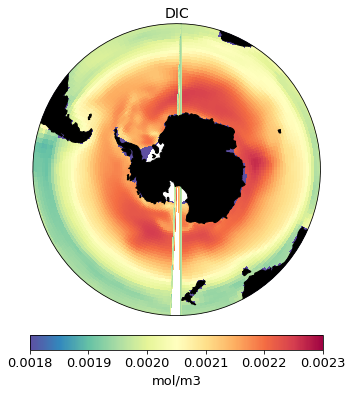

In [12]:
def plot_southern(fig, ax1, lons, lats, tdat, tvmin, 
tvmax, tticks, fs = 12, 
tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
    ax1.set_extent([-180, 180, -80, -28], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    mesh = ax1.pcolormesh(lons, lats, tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax, 
            transform=ccrs.PlateCarree())
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                        edgecolor='face', facecolor='k'))
    ax1.set_title(tit, fontsize = fs)
    cb = 0
    if cbr:
        cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
            pad = 0.06, fraction = 0.045, shrink = 0.9)
        cb.set_label(label=cbarlab,fontsize = fs-1)
        cb.set_ticks(tticks, fontsize = 80)
        cb.ax.tick_params(labelsize=fs-1)
        return cb
#### open file
tfil = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_DW_GA01/ORCA2_1m_19810101_19811231_ptrc_T.nc')
tdat = tfil.DIC[0,0,:,:].values
lats = tfil.nav_lat; lons = tfil.nav_lon
tvmin = 1.8e-3; tvmax = 2.301e-3; intvl = 1e-4
tticks = np.arange(tvmin , tvmax, intvl)
tcbarlab = 'mol/m3'; ttit = 'DIC'
tfs = 14
fact = 0.6
fig = plt.figure(figsize=[10*fact, 10*fact])
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0, -90))
plot_southern(fig, ax1, lons, lats, tdat, tvmin, 
            tvmax, tticks, fs = tfs, 
            tit = ttit, cbarlab = tcbarlab, tcmap = 'Spectral_r', lm = True, cbr = True)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


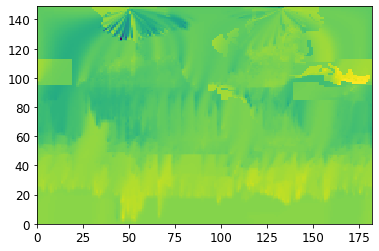

In [10]:
plt.pcolormesh(PT_TC11.TRNDIC[0,:,:])